COVID-19_Global_Data_Analysis

In [1]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization styles
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# --- Load the Dataset ---
# Ensure 'owid-covid-data.csv' is in your working directory
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
# --- Initial Data Exploration ---
print(data.info())
print(data.columns)

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
# --- Data Cleaning ---
# Focus on data with non-missing total cases, deaths, populations
data = data.dropna(subset=['total_cases', 'total_deaths', 'population'])

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Optional: filter for recent data (last 6 months)
# recent_data = data[data['date'] > '2024-11-01']

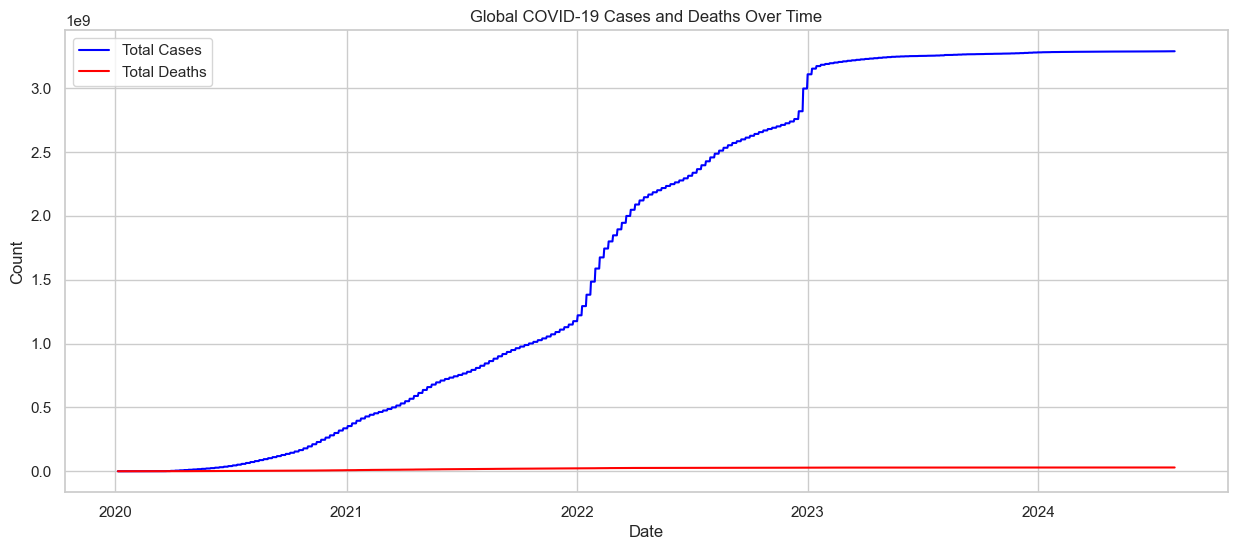

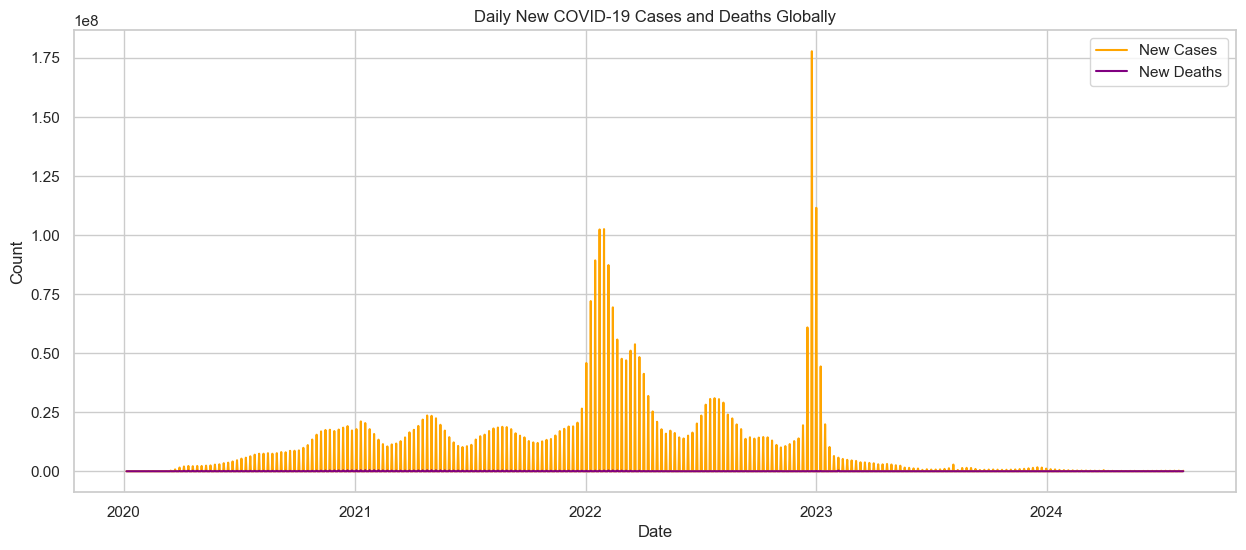

In [6]:
# Aggregate global data over time
global_data = data.groupby('date').sum()

plt.figure(figsize=(15, 6))
plt.plot(global_data.index, global_data['total_cases'], label='Total Cases', color='blue')
plt.plot(global_data.index, global_data['total_deaths'], label='Total Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Cases and Deaths Over Time')
plt.legend()
plt.show()

# Plot new cases and new deaths per day
plt.figure(figsize=(15, 6))
plt.plot(global_data.index, global_data['new_cases'], label='New Cases', color='orange')
plt.plot(global_data.index, global_data['new_deaths'], label='New Deaths', color='purple')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily New COVID-19 Cases and Deaths Globally')
plt.legend()
plt.show()

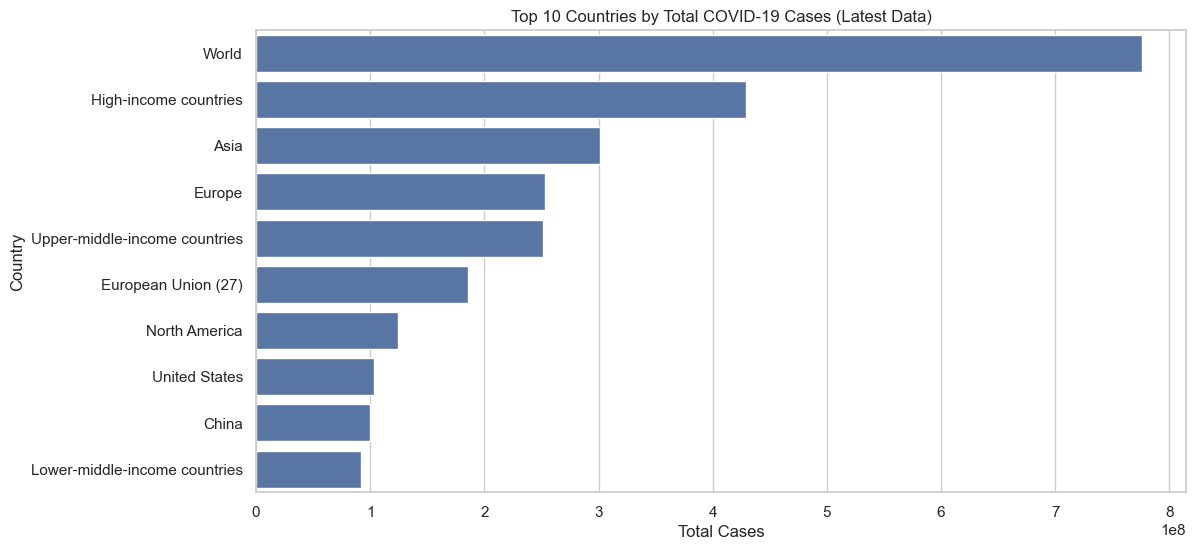

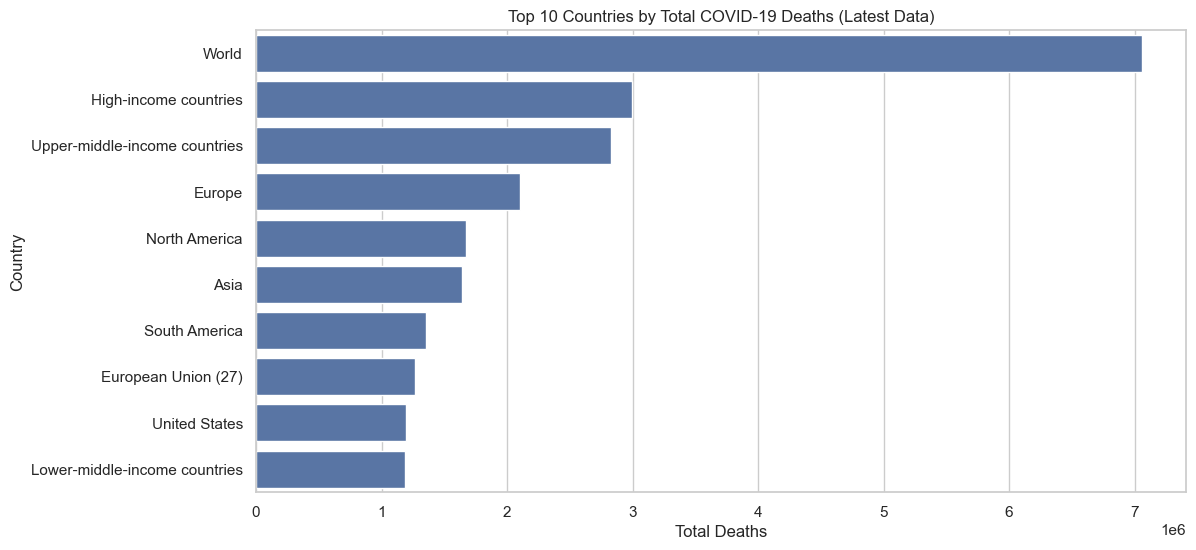

In [7]:
# Latest date in data
latest_date = data['date'].max()
latest_snapshot = data[data['date'] == latest_date]

# Top 10 countries by total cases
top_cases = latest_snapshot[['location', 'total_cases']].sort_values(by='total_cases', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_cases)
plt.title('Top 10 Countries by Total COVID-19 Cases (Latest Data)')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

# Top 10 countries by total deaths
top_deaths = latest_snapshot[['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_deaths', y='location', data=top_deaths)
plt.title('Top 10 Countries by Total COVID-19 Deaths (Latest Data)')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

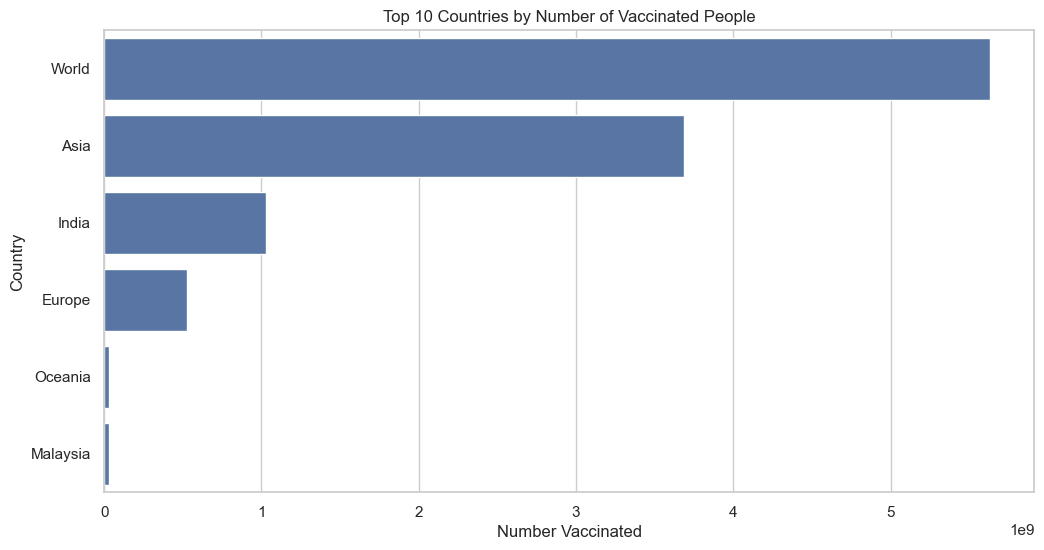

In [8]:
# Filter vaccination data
vacc_data = data.dropna(subset=['people_vaccinated'])

# Latest date vaccination summary
latest_vacc = vacc_data[vacc_data['date'] == latest_date]

# Top 10 countries by vaccinated people
top_vacc = latest_vacc[['location', 'people_vaccinated']].sort_values(by='people_vaccinated', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='people_vaccinated', y='location', data=top_vacc)
plt.title('Top 10 Countries by Number of Vaccinated People')
plt.xlabel('Number Vaccinated')
plt.ylabel('Country')
plt.show()

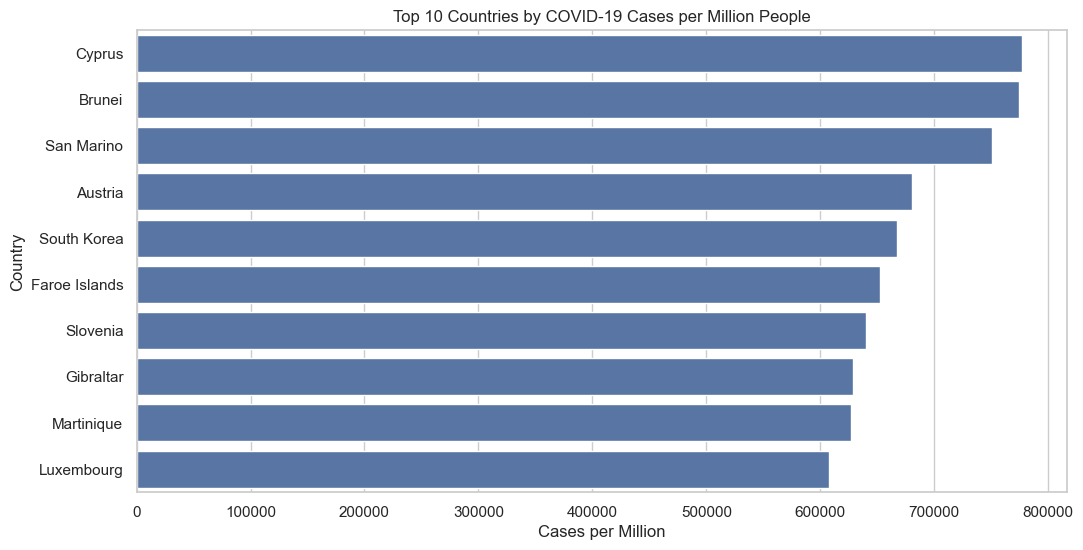

In [10]:
# Calculate cases per million
data['cases_per_million'] = data['total_cases'] / data['population'] * 1_000_000
data['deaths_per_million'] = data['total_deaths'] / data['population'] * 1_000_000

# Group by 'location' and get max of only the relevant numeric columns
top_cases_per_million = data.groupby('location')[['cases_per_million']].max()

# Sort by 'cases_per_million' in descending order
top_cases_per_million = top_cases_per_million.sort_values(by='cases_per_million', ascending=False).head(10)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='cases_per_million', y=top_cases_per_million.index, data=top_cases_per_million)
plt.title('Top 10 Countries by COVID-19 Cases per Million People')
plt.xlabel('Cases per Million')
plt.ylabel('Country')
plt.show()

In [11]:
# Interactive map of total cases
fig = px.choropleth(
    latest_snapshot,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Viridis',
    title='Global COVID-19 Total Cases'
)
fig.show()

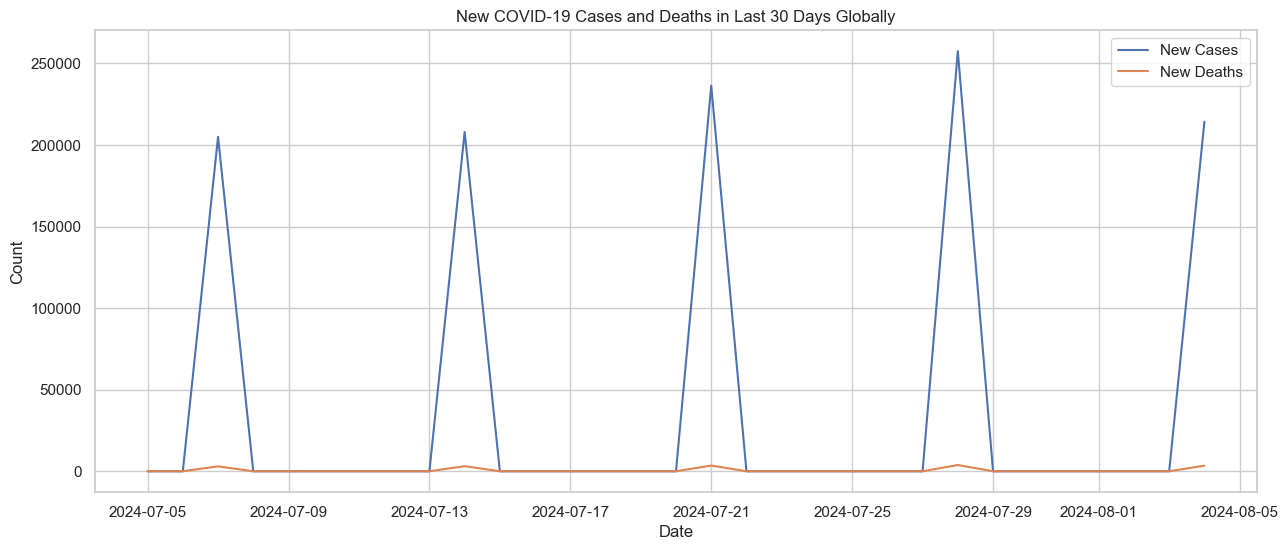

In [12]:
import datetime
# Filter last 30 days
end_date = data['date'].max()
start_date = end_date - pd.Timedelta(days=30)
last_month_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Aggregate worldwide
last_month_agg = last_month_data.groupby('date').sum()

plt.figure(figsize=(15, 6))
plt.plot(last_month_agg.index, last_month_agg['new_cases'], label='New Cases')
plt.plot(last_month_agg.index, last_month_agg['new_deaths'], label='New Deaths')
plt.title('New COVID-19 Cases and Deaths in Last 30 Days Globally')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [13]:
import os
print(os.getcwd())

c:\Users\HP\Desktop\plp python folder\COVID-19_Global_Data_Tracker_Project
